In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_image,train_label),(test_image,test_label)=keras.datasets.fashion_mnist.load_data()

In [3]:
class_names=['T-shirt/top','Trouser','pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

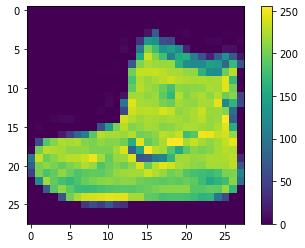

In [4]:
plt.figure()
plt.imshow(train_image[0])
plt.colorbar()
plt.show()

In [5]:
train_image=train_image/255.0
test_image=test_image/255.0

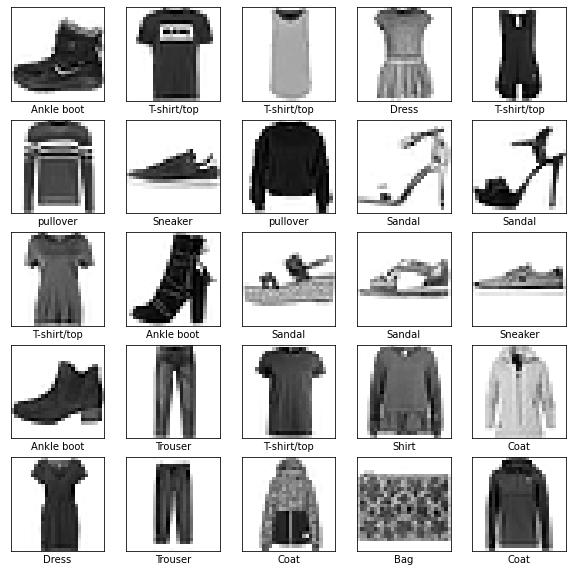

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_image[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_label[i]])
plt.show()

In [7]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=128 , activation="relu"))
model.add(tf.keras.layers.Dense(units=10,activation="softmax"))

In [8]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [9]:
model.fit(train_image,train_label,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4989 - accuracy: 0.8248
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3744 - accuracy: 0.8655
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3362 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3152 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2936 - accuracy: 0.8923
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2792 - accuracy: 0.8975
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2683 - accuracy: 0.9012
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2561 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2465 - accuracy: 0.9082
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

In [10]:
test_loss,test_acc = model.evaluate(test_image,test_label)

313/313 [==============================] - 0s 788us/step - loss: 0.3346 - accuracy: 0.8844


In [12]:
predications=model.predict(test_image)

In [13]:
predications[0]
int(np.argmax(predications[0]))

9

In [121]:
test_label[0]

9

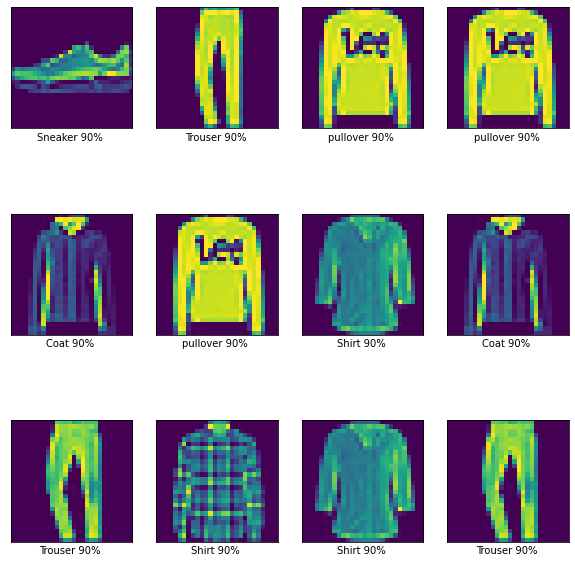

In [15]:
plt.figure(figsize=(10,45))
noofimg=12
for i in range(noofimg):
    plt.subplot(noofimg,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_image[np.argmax(predications[i])])
    plt.xlabel("{} {:2.0f}% ".format(class_names[test_label[np.argmax(predications[i])]],(100*int(np.argmax(predications[0])))/10))
plt.show()

In [16]:
def plot_image(i,predications_array,true_label,img):
    predications_array,true_label,img = predications_array[i],true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap=plt.cm.binary)
    predicted_label = np.argmax(predications_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color='red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],100*np.max(predications_array),class_names[true_label]),color=color)
    

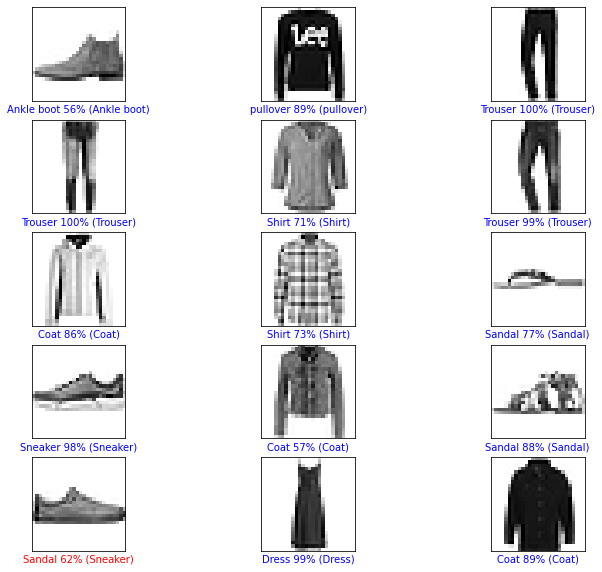

In [129]:
num_rows=5
num_cols=3
num_images=num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i,predications,test_label,test_image)
plt.show()